In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read File
file_path = 'cleaned.csv'
hmda = pd.read_csv(file_path)

In [93]:
hmda_sample = hmda.sample(frac =.20) 

In [95]:
len(hmda_sample)

4973332

In [96]:
len(hmda)

24866658

In [97]:
hmda_sample.dtypes

as_of_year                          int64
action_taken                        int64
loan_type                           int64
loan_purpose                        int64
loan_amount_000s                  float64
msamd                             float64
state_code                        float64
county_code                       float64
applicant_ethnicity                 int64
co_applicant_ethnicity              int64
applicant_race_1                    int64
co_applicant_race_1                 int64
applicant_sex                       int64
co_applicant_sex                    int64
applicant_income_000s             float64
purchaser_type                      int64
rate_spread                       float64
hoepa_status                        int64
population                        float64
minority_population               float64
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     

In [98]:
# Dropping rate_spread for now as well
X = hmda_sample.drop(columns=['action_taken', 'rate_spread'])
y = hmda_sample['action_taken']


In [99]:
X = pd.get_dummies(X, drop_first=True)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, verbose=2)
rf_model.fit(X_train, y_train)


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 14.4min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(random_state=42, verbose=2)

In [102]:
# Accuracy Scores and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   23.2s


              precision    recall  f1-score   support

           0       0.93      0.99      0.96    827095
           1       0.96      0.61      0.75    167572

    accuracy                           0.93    994667
   macro avg       0.94      0.80      0.85    994667
weighted avg       0.93      0.93      0.92    994667

Confusion Matrix
[[822877   4218]
 [ 65326 102246]]


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   20.3s


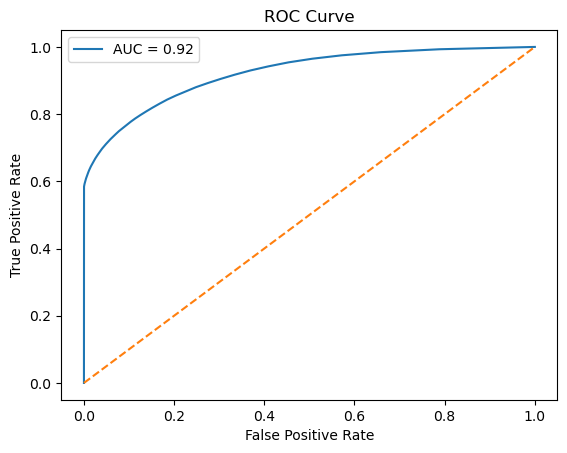

In [105]:
# ROC AUC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

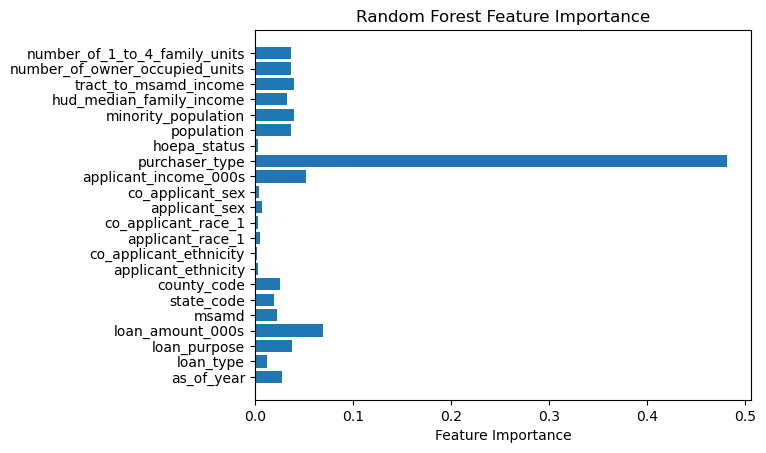

In [113]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [115]:
from sklearn.naive_bayes import GaussianNB

In [117]:
hmda_nb = GaussianNB()

hmda_nb.fit(X_train, y_train)

GaussianNB()

In [119]:
y_pred = hmda_nb.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    827095
           1       0.99      0.53      0.69    167572

    accuracy                           0.92    994667
   macro avg       0.95      0.77      0.82    994667
weighted avg       0.93      0.92      0.91    994667

Confusion Matrix
[[826455    640]
 [ 78388  89184]]


In [121]:
y_pred = hmda_nb.predict(X_test)

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 92.05482839985643


In [123]:
# race_mapping = {5: 'White', 3: 'Black or African American', 2: 'Asian', 1: 'American Indian or Alaska Native', 4: 'Native Hawaiian or Other Pacific Islander'}
# hmda_sample['action_taken'] = hmda_sample['action_taken'].apply(lambda x: 1 if x in [1, 2] else 0)
# hmda_sample['applicant_race_1'] = hmda_sample['applicant_race_1'].map(race_mapping)
# hmda_sample.describe()

In [125]:
hmda_sample['applicant_race_1']

3488690     5
23129410    5
12320077    5
16284585    3
19893648    5
           ..
7929877     5
18725719    5
24543310    5
3188380     5
15594444    5
Name: applicant_race_1, Length: 4973332, dtype: int64

In [133]:
#Training the data on white data and then testing on all data
# 5 is white
white_data = hmda_sample[hmda_sample['applicant_race_1'] == 5]
X_white = white_data.drop(columns=['action_taken', 'rate_spread'])
y_white = white_data['action_taken']


In [135]:
white_data

,as_of_year,action_taken,loan_type,loan_purpose,loan_amount_000s,msamd,state_code,county_code,applicant_ethnicity,co_applicant_ethnicity,...,applicant_income_000s,purchaser_type,rate_spread,hoepa_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
3488690,2007,1,1,2,60.0,40380.0,36.0,55.0,2,0,...,44.0,0,7.43,2,3612.0,27.770000,62000.0,70.629997,831.0,1407.0
23129410,2016,1,1,1,304.0,19804.0,26.0,163.0,2,2,...,156.0,7,1.59,2,4340.0,12.650000,53500.0,212.369995,1395.0,1419.0
12320077,2011,0,1,3,113.0,24340.0,26.0,123.0,2,2,...,102.0,0,-1.00,2,4002.0,3.820000,59500.0,86.919998,1220.0,1984.0
19893648,2015,1,1,1,24.0,12420.0,48.0,209.0,2,0,...,41.0,0,7.17,2,6569.0,48.529999,76800.0,75.349998,502.0,930.0
22013698,2016,0,1,2,75.0,35084.0,34.0,13.0,2,2,...,95.0,0,-1.00,2,6769.0,14.020000,95100.0,130.270004,1966.0,2308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929877,2008,1,2,1,105.0,24340.0,26.0,81.0,2,0,...,29.0,2,3.11,2,6581.0,14.100000,59200.0,103.610001,1499.0,1645.0
18725719,2014,1,2,1,191.0,29404.0,17.0,97.0,2,0,...,48.0,7,1.52,2,5899.0,21.070000,84200.0,117.540001,2154.0,2230.0
24543310,2017,0,1,3,218.0,40140.0,6.0,71.0,1,0,...,46.0,0,-1.00,2,5229.0,75.879997,63200.0,108.489998,809.0,1191.0
3188380,2007,1,1,3,255.0,10500.0,13.0,177.0,2,2,...,125.0,8,5.50,2,10341.0,9.940000,47400.0,168.539993,2749.0,3609.0


In [137]:
white_data['applicant_race_1']

3488690     5
23129410    5
12320077    5
19893648    5
22013698    5
           ..
7929877     5
18725719    5
24543310    5
3188380     5
15594444    5
Name: applicant_race_1, Length: 3919368, dtype: int64

In [160]:
scaler = StandardScaler()
X_white_scaled = scaler.fit_transform(X_white)

In [162]:
hmda_nb.fit(X_white_scaled, y_white)

GaussianNB()